---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Katherine Chavarría Nájera**
* Carné: **B41841**
* Grupo: **1**
---


## `L5` - *Cadenas de Markov*

---
## Asignaciones

La administración del servicio desea ahora que el servidor no esté vacío (sin atender solicitudes) más del 10% del tiempo. Hallar el parámetro $\nu$ para satisfacer este requisito y modificar el código para medir la variable de interés en una simulación.

---

### Replanteando el problema dado de un servidor web

> Un servidor web es modelado como un sistema M/M/1 con una tasa de arribo de 2 solicitudes por minuto. Es deseado que el servidor no esté vacío (sin atender solicitudes) más del 10% del tiempo. ¿Qué tan rápido debe ser el servicio?

#### Solución:

De los datos del problema: $\lambda = 2$. Para hallar el parámetro $\nu$ que satisface este requisito se necesita:

$$
\begin{aligned}
P( \text{1 o más clientes en el sistema} ) = \rho^1 & = \left( \frac{\lambda}{\nu} \right)^1 \geq 0.9 \\
\nu^1 & \leq \frac{\lambda^1}{0.9} = \frac{2^1}{0.9} = 2.22 \quad \Rightarrow \quad \nu \leq 2.22
\end{aligned}
$$

es decir, el servidor debe atender menos de 2,22 solicitudes por minuto en promedio para poder satisfacer el requisito.

Parámetro lambda = 2.0
Parámetro nu = 2.22
Tiempo con 0 solicitudes en el sistema:
	 4.51%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.24 horas.


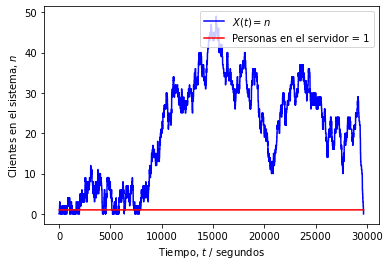

In [13]:
# Se importa la librería NumPy.
import numpy as np

# Se importa el módulo stats de SciPy.
from scipy import stats

# Se importa la biblioteca "matplotlib" junto con la función "pyplot".
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 2/60

# Parámetro de servicio (servicios/segundos)
nu = 2.22/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 1

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
frecuencia = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] == 0: 
        frecuencia += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = frecuencia / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con {} solicitudes en el sistema:'.format(P-1))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.1:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt, color = 'blue')
plt.plot(range(len(t)), (P)*np.ones(t.shape), color = 'r')
plt.legend(('$X(t) = n$', 'Personas en el servidor = ' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---